<a href="https://colab.research.google.com/github/Websipus888/R_tutorial/blob/master/10_Monkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vasutornchaowalit","key":"cd5b183f1d1d54bef8a04d028e578ea1"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-10 18:11:20          15471  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9397  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4203  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3437  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [7]:
!kaggle datasets download -d slothkong/10-monkey-species

100% 545M/547M [00:06<00:00, 121MB/s]
100% 547M/547M [00:06<00:00, 89.1MB/s]


In [8]:
! mkdir train

In [10]:
! unzip 10-monkey-species.zip -d train

Archive:  10-monkey-species.zip
  inflating: train/monkey_labels.txt  
  inflating: train/training/training/n0/n0018.jpg  
  inflating: train/training/training/n0/n0019.jpg  
  inflating: train/training/training/n0/n0020.jpg  
  inflating: train/training/training/n0/n0021.jpg  
  inflating: train/training/training/n0/n0022.jpg  
  inflating: train/training/training/n0/n0023.jpg  
  inflating: train/training/training/n0/n0024.jpg  
  inflating: train/training/training/n0/n0025.jpg  
  inflating: train/training/training/n0/n0026.jpg  
  inflating: train/training/training/n0/n0027.jpg  
  inflating: train/training/training/n0/n0028.jpg  
  inflating: train/training/training/n0/n0029.jpg  
  inflating: train/training/training/n0/n0030.jpg  
  inflating: train/training/training/n0/n0031.jpg  
  inflating: train/training/training/n0/n0032.jpg  
  inflating: train/training/training/n0/n0033.jpg  
  inflating: train/training/training/n0/n0034.jpg  
  inflating: train/training/training/n0/n0035

In [11]:
import numpy as np
from pathlib import Path
import pandas as pd
import cv2
import matplotlib.pylab as plt

In [25]:
train_dr = Path('../content/train/training/training/')
test_dr = Path('../content/train/validation/validation/')

In [26]:
monkey_labels = pd.read_csv('../content/train/monkey_labels.txt')
monkey_labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


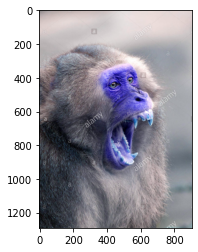

In [29]:
img = cv2.imread('../content/train/training/training/n3/n3020.jpg')
plt.imshow(img)

In [34]:
img.shape

(1291, 904, 3)

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
generate_train_data = ImageDataGenerator(rescale=1./255)
train_generator = generate_train_data.flow_from_directory(train_dr,target_size=(120,120),batch_size=32,class_mode='categorical') 


generate_test_data = ImageDataGenerator(rescale=1./255)
test_generator = generate_test_data.flow_from_directory(test_dr,target_size=(120,120),batch_size=32,class_mode='categorical') 

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [38]:
my_model =Sequential()
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(120,120,3),activation='relu'))
my_model.add(MaxPool2D(pool_size=(2,2)))

my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(120,120,3),activation='relu'))
my_model.add(MaxPool2D(pool_size=(2,2)))


my_model.add(Flatten())

my_model.add(Dense(128,activation='relu'))

my_model.add(Dense(10,activation='softmax'))

my_model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [39]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 117, 117, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 58, 58, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 23328)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [41]:
my_model.fit_generator(train_generator, epochs = 5 , validation_data=train_generator,callbacks = early_stop,verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
35/35 [==============================] - 73s 2s/step - loss: 2.1290 - accuracy: 0.2368 - val_loss: 1.6442 - val_accuracy: 0.4271
Epoch 2/5
35/35 [==============================] - 71s 2s/step - loss: 1.3486 - accuracy: 0.5474 - val_loss: 0.9243 - val_accuracy: 0.7505
Epoch 3/5
35/35 [==============================] - 71s 2s/step - loss: 0.8529 - accuracy: 0.7140 - val_loss: 0.5239 - val_accuracy: 0.8406
Epoch 4/5
35/35 [==============================] - 71s 2s/step - loss: 0.4499 - accuracy: 0.8570 - val_loss: 0.2761 - val_accuracy: 0.9171
Epoch 5/5
35/35 [==============================] - 72s 2s/step - loss: 0.1923 - accuracy: 0.9508 - val_loss: 0.1179 - val_accuracy: 0.9800


In [42]:
losse = pd.DataFrame(my_model.history.history)
losse.head()

,loss,accuracy,val_loss,val_accuracy
0,2.128971,0.236794,1.644243,0.427140
1,1.348567,0.547359,0.924265,0.750455
2,0.852936,0.714025,0.523892,0.840619
3,0.449933,0.857013,0.276103,0.917122
4,0.192324,0.950820,0.117949,0.979964


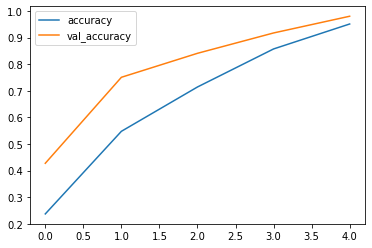

In [43]:
losse[['accuracy','val_accuracy']].plot()

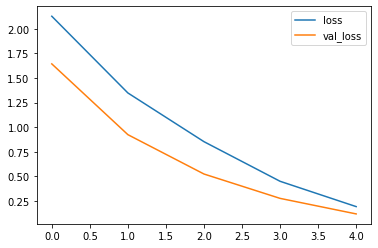

In [44]:
losse[['loss','val_loss']].plot()